# Overhead setting

In [ ]:
#pip install pandas-datareader

In [2]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import datetime
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import numpy as np
import pandas_datareader.data as web

In [ ]:
# Load .env enviroment variables
#load_dotenv()

In [ ]:
# Set Alpaca API key and secret key
# alpaca_api_key = os.getenv("ALPACA_API_KEY")
# alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
# api = tradeapi.REST(
#     alpaca_api_key,
#     alpaca_secret_key,
#     api_version="v2"
# )

In [19]:
# Universal variables:
T=10
stock="AMZN"
benchmark="SPY"
yield10y="^TNX"
crypto="BTC-USD"


end = datetime.date.today()
begin=end-pd.DateOffset(365*T)
st=begin.strftime('%Y-%m-%d')
ed=end.strftime('%Y-%m-%d')
start_date = pd.Timestamp(st, tz="America/New_York").isoformat()
end_date = pd.Timestamp(ed, tz="America/New_York").isoformat()


In [7]:
# Universal Functions

def n_year_ago(n):
    # to get the date of "n years ago from today"
    n_years_ago=(end-pd.DateOffset(365*n)).strftime('%Y-%m-%d')
    return n_years_ago


# Grab data from Yahoo Finance

In [20]:
ticker_df = web.DataReader(stock, 'yahoo', start_date, end_date)
ticker_close=round(ticker_df[['Close']],2)

In [18]:
ticker_close

,Close
Date,
2016-04-18,635.35
2016-04-19,627.90
2016-04-20,632.99
2016-04-21,631.00
2016-04-22,620.50
...,...
2022-04-08,3089.21
2022-04-11,3022.44
2022-04-12,3015.75


In [ ]:
SPY = df_raw[df_raw['symbol']=='SPY'].drop('symbol', axis=1)
AMZN = df_raw[df_raw['symbol']=='AMZN'].drop('symbol', axis=1)

In [ ]:
AMZN.tail()

In [ ]:
AMZN['open'].plot(label= 'AMZN Open price', figsize=(15,7))
AMZN['close'].plot(label= 'AMZN Close price')
AMZN['high'].plot(label= 'AMZN High price')
AMZN['low'].plot(label= 'AMZN Low price')
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend()
plt.show()

In [ ]:
SPY['open'].plot(label= 'SPY Open price', figsize=(15,7))
SPY['close'].plot(label= 'SPY Close price')
# SPY['high'].plot(label= 'SPY High price')
# SPY['low'].plot(label= 'SPY Low price')
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend()
plt.show()

In [ ]:
AMZN['close'].plot(label= 'AMZN Close price', figsize=(15,7))
SPY['close'].plot(label= 'SPY Close price')
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend()
plt.show()

In [ ]:
AMZN['volume'].plot(label='AMZN', figsize=(15,7))
plt.ylabel('Volume Traded')
plt.xlabel('Date')
plt.title('AMZN Volume Traded for the past 6 years')

In [ ]:
SPY['volume'].plot(label='SPY', figsize=(15,7))
AMZN['volume'].plot(label='AMZN')
plt.legend()
plt.ylabel('Volume Traded')
plt.xlabel('Date')
plt.title('Volume Traded for the past 6 years')

In [ ]:
AMZN['total_traded'] = AMZN['open']*AMZN['volume']
SPY['total_traded'] = SPY['open']*SPY['volume']

In [ ]:
AMZN['total_traded'].plot(label='AMZN', figsize=(15,7))
SPY['total_traded'].plot(label='SPY')
plt.xlabel('Date')
plt.ylabel('Total Traded')
plt.legend()

In [ ]:
AMZN.iloc[[AMZN.total_traded.argmax()]]

In [ ]:
AMZN.iloc[[AMZN.total_traded.argmin()]]

In [ ]:
SPY.iloc[[SPY.total_traded.argmax()]]

In [ ]:
SPY.iloc[[SPY.total_traded.argmin()]]

# Create function to generate metrics

* 1-year/5-year rolling return 
* annualized rolling volatility 
* annualized rolling sharpe ratio 
* 1-year/5-year cumulative return 


In [ ]:
def risk_return_metrics(df,ticker,years_list):

    
    ticker_close['daily_return']=ticker_close['close'].pct_change()
    
    
    # calculate n-year rolling return and cum return
    for years in years_list:
        
        # calculate n-year rolling total return
        ticker_close[f'{years}yr_return']=ticker_close['close'].pct_change(periods=252*years)
        # calculate n-year rolling annualized return if n>1
        if years>1:
            ticker_close[f'{years}yr_return_annualzd']=(1+ticker_close[f'{years}yr_return'])**(1/years)-1
        # calculate n-year cum return
        ticker_close[f'{years}yr_cum_return'] = (1 + ticker_close['daily_return'])[n_year_ago(years):].cumprod() - 1  
    
    
    # calculate annualized rolling standard deviation:
    ticker_close['annualizd_volatility']=ticker_close['daily_return'].rolling(252).std()*(252**0.5)
    # calculate annualized rolling sharpe ratio:
    ticker_close['annualizd_sharpe']=(252**0.5)*(ticker_close['daily_return'].rolling(252).mean()/ticker_close['annualizd_volatility'])
    
    return ticker_close
    


# Output final datasets

In [ ]:
years_list=[1,5]
s_df=risk_return_metrics(df_raw,selected_stock,years_list)
b_df=risk_return_metrics(df_raw,benchmark,years_list)
s_df.to_csv("Data/selected_stock.csv")
b_df.to_csv("Data/benchmark.csv")

In [ ]:
s_df.describe()

In [ ]:
# Moving Average Plots
s_df.close.plot(label='AMZN Close',figsize=(15,7))
s_df.close.rolling(50).mean().plot(label='AMZN MA50')
s_df.close.rolling(200).mean().plot(label='AMZN MA200')
plt.legend()

In [ ]:
# Moving Average Plots
b_df.close.plot(label='SPY Close',figsize=(15,7))
b_df.close.rolling(50).mean().plot(label='SPY MA50')
b_df.close.rolling(200).mean().plot(label='SPY MA200')
plt.legend()

# Correlation

Correlation is a statistic that measures the degree to which two variables move in relation to each other. Correlation measures association, but doesn’t show if x causes y or vice versa.

The correlation between two stocks is a number form -1 to 1 (both inclusive).

 - A positive correlation means, when stock x goes up, we expect stock y to go up, and opposite.
 - A negative correlation means, when stock x goes up, we expect stock y to go down, and opposite.
 - A zero correlation, we cannot say anything in relation to each other.
 
The formula for calculating the correlation is quite a mouthful.

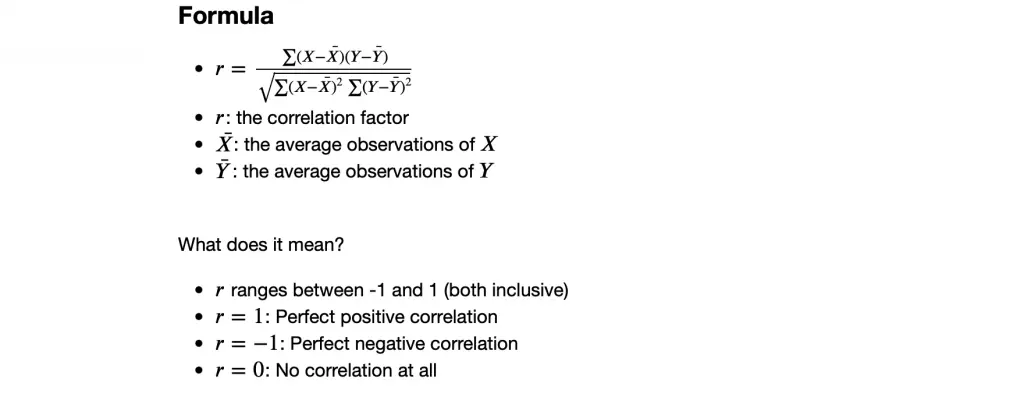

In [ ]:
corr_s_with_b = pd.concat([s_df.close, s_df['5yr_return_annualzd']	, b_df.close, b_df['5yr_return_annualzd']], axis=1)
corr_s_with_b.columns = ['AMZN_close', 'AMZN_returns', 'SPY_close', 'SPY_returns']

In [ ]:
scatter_matrix(corr_s_with_b[['AMZN_close', 'SPY_close']], figsize=(8,8))

In [ ]:
b_df['5yr_return_annualzd'].hist(bins=100, label='SPY', alpha=0.5, figsize=(15,7))
s_df['5yr_return_annualzd'].hist(bins=100, label='AMZN', alpha=0.5)
plt.legend()

In [ ]:
b_df['5yr_return_annualzd'].plot(kind='kde', label='SPY', figsize=(15,7))
s_df['5yr_return_annualzd'].plot(kind='kde', label='AMZN')
plt.legend()
plt.show()

In [ ]:
corr_s_with_b[['AMZN_returns', 'SPY_returns']].plot(kind='box', figsize=(15,7))

In [ ]:
scatter_matrix(corr_s_with_b[['AMZN_returns', 'SPY_returns']], figsize=(15,7), hist_kwds={'bins':100})

In [ ]:
corr_close_data = corr_s_with_b[['AMZN_close', 'SPY_close']]

In [ ]:
log_returns = np.log(corr_close_data/corr_close_data.shift())
log_returns.corr()